# ART GRAPHITE Blackbox Attack

First, setup all related imports.

In [1]:
import warnings
warnings.filterwarnings('ignore')

from keras.models import load_model

from art import config
from art.utils import load_dataset, get_file
from art.estimators.classification import KerasClassifier
from art.attacks.evasion import GRAPHITEBlackbox

import numpy as np

#%matplotlib inline
import matplotlib.pyplot as plt

from tensorflow.python.framework.ops import disable_eager_execution

disable_eager_execution()


# Model and Data Definition

Second, load the data and models to perform an attack.

In [2]:
(x_train, y_train), (x_test, y_test), min_, max_ = load_dataset('cifar10')

num_samples_train = 100
num_samples_test = 100
x_train = x_train[0:num_samples_train]
y_train = y_train[0:num_samples_train]
x_test = x_test[0:num_samples_test]
y_test = y_test[0:num_samples_test]

class_descr = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

path = get_file('cifar_resnet.h5',extract=False, path=config.ART_DATA_PATH,
                url='https://www.dropbox.com/s/ta75pl4krya5djj/cifar_resnet.h5?dl=1')
classifier_model = load_model(path)
classifier = KerasClassifier(clip_values=(min_, max_), model=classifier_model, use_logits=False,
                             preprocessing=(0.5, 1))

Instructions for updating:
Colocations handled automatically by placer.


# Get Target and Init Images

Third, view the example initialization and target images to perform the attack with.

Target image is:  0


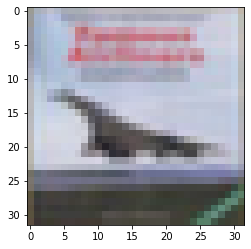

Init image is:  8


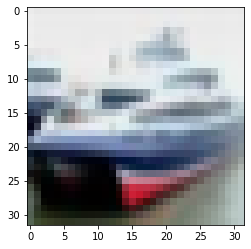

In [3]:
init_image = x_test[1, :, :, :]
target_image = x_test[3, :, :, :]

print("Target image is: ", np.argmax(classifier.predict(np.array([target_image]))[0]))
plt.imshow((target_image * 255).astype(np.uint))
plt.show()
print("Init image is: ", np.argmax(classifier.predict(np.array([init_image]))[0]))
plt.imshow((init_image * 255).astype(np.uint))
plt.show()

# GRAPHITE Blackbox Attack

Finally, run the example attack over a GRAPHITEBlackbox instance. We provide the noise size and net size for the CIFAR-10 dataset and model, and run over 50 transforms. We optionally specify additional arguments at the end for this particular example.

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


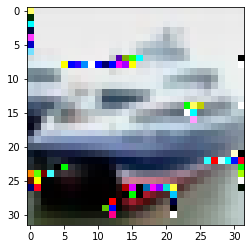

In [5]:
print(y_test[0], y_test[1])
attack = GRAPHITEBlackbox(classifier, (32, 32), (32, 32), (4, 4), batch_size = 1, num_xforms_mask = 50, num_xforms_boost = 50, heatmap_mode = 'Target', num_boost_queries = 200 * 50, blur_kernels = [1], tr_lo = 0.4, tr_hi = 0.6)
x_adv = attack.generate(x=x_test[1, :, :, :][np.newaxis, :, :, :], y=y_test[3][np.newaxis, :], mask=None, x_tar=x_test[3, :, :, :][np.newaxis, :, :, :])
plt.imshow(x_adv[0])
plt.show(block=False)